In [2]:
# Requeriments: pip install matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from miscellaneous_ploting import * #we import numpy here

### Selección de Dataset

In [3]:
dataset_name = "ls_orchid"
dataset_name = "usp_987"
dataset_name = "usp_f"

### Selección de Parámetros y Carga de Datos:

In [4]:
#################################################
#Select complexity:
# 1: Icalc
# 2: Discrepancia
# 3: Discrepancia en Bloque 2
# 4: Kolmogorov / BDM algorithmic complexity estimation (bits)
# 5: Bennett / BDM logical depth estimation (steps)
# 6: Shannon entropy (bit(s))
# 7: Second order entropy (bit(s))
# 8: Compression length (using gzip) (bits)
selection = 8
#################################################

[complexity, shuffled_results,  random_results, y_range] = get_parameters_for(selection, dataset_name)
sizes = read_list_from_file("data/sizes_" + dataset_name + ".txt")
original = shuffled_results[0]

#Convierte el tipo de list a numpy.ndarray
Xs = np.matrix(shuffled_results[1:]).A
Xr = np.matrix(random_results[1:]).A

mean_s = Xs.mean(axis=0)
sigma_s = Xs.std(axis=0)
mean_r = Xr.mean(axis=0)
sigma_r = Xr.std(axis=0)

colors = ['lightblue', 'orange', 'tomato']

In [5]:
def plot_with_and_without_outlayers(data, type:str, log_x:bool = False, bins_x:int = 450, bins_y:int = 200):
    #Set colormap (un quilombo)
    magma = mpl.colormaps['magma'].resampled(256)
    newcolors = magma(np.linspace(0, 1, 100000))
    white = np.array([256/256, 256/256, 256/256, 1]) # color en formato rgb: [R/256, G/256, B/256, 1]
    newcolors[:1, :] = white
    magma2 = ListedColormap(newcolors)

    fig = plt.figure(figsize=(12, 4.5), layout='constrained')
    (ax1, ax2) = fig.subplots(1, 2)

    fig.suptitle(dataset_name + " " + type + " en complejidad " + complexity)
    ax1.set_title("Con Outlayers")
    ax2.set_title("Sin Outlayers")
    ax1.set_ylabel("Complejidad en " + complexity)
    ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else ""))
    ax1.set_ylabel("Complejidad en " + complexity + " (bin size = " + str((y_range[1]-y_range[0])/bins_y)[:7] + ")")
    ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")

    # necesario para que ambos gráficos sean consistentes con los colores y el colorbar
    norm = mpl.colors.Normalize(vmin=0, vmax=850)

    ax1.plot(sizes, data, 'o', markersize=1)
    ax1.grid()

    qsy = ax2.hist2d(sizes, data, bins=(bins_x, bins_y),
            range = [[0, 900], y_range],
            cmap = magma2)
            #norm = norm)

    # ax2.hist2d devuelve (counts, xedges, yedges, Image) y sólo necesito el Image
    fig.colorbar(qsy[3], ax=ax2)

    if log_x:
        ax1.set_xscale('log')
        ax2.set_xscale('log')
        ax2.set_xlim(40, 1000)
        
    plt.show()

#### Plotting Boxplot for Random and Suffled Dataset

#### Honestamente, el mejor gráfico de todos los tiempos:

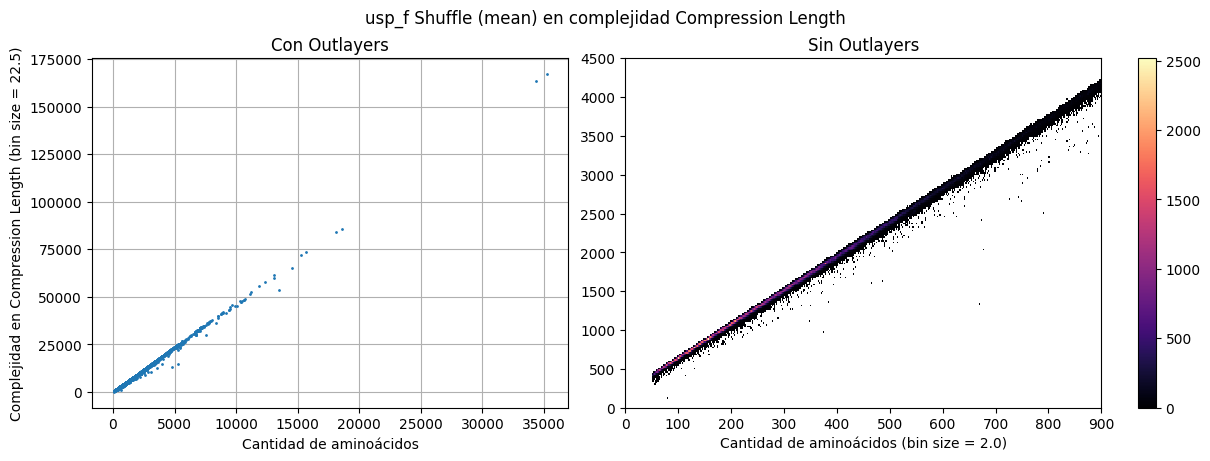

In [6]:
plot_with_and_without_outlayers(mean_s, "Shuffle (mean)")

In [7]:
### Determina si aparecen los Outliers de size ###

outliers = False
#outliers = True

log_x = True
log_x = False

##################################################

if not outliers:
    upper_limit = int(-(-get_boxplot_lines(sizes)[0] // 100)) * 100 #usa múltiplos de 100 para el techo

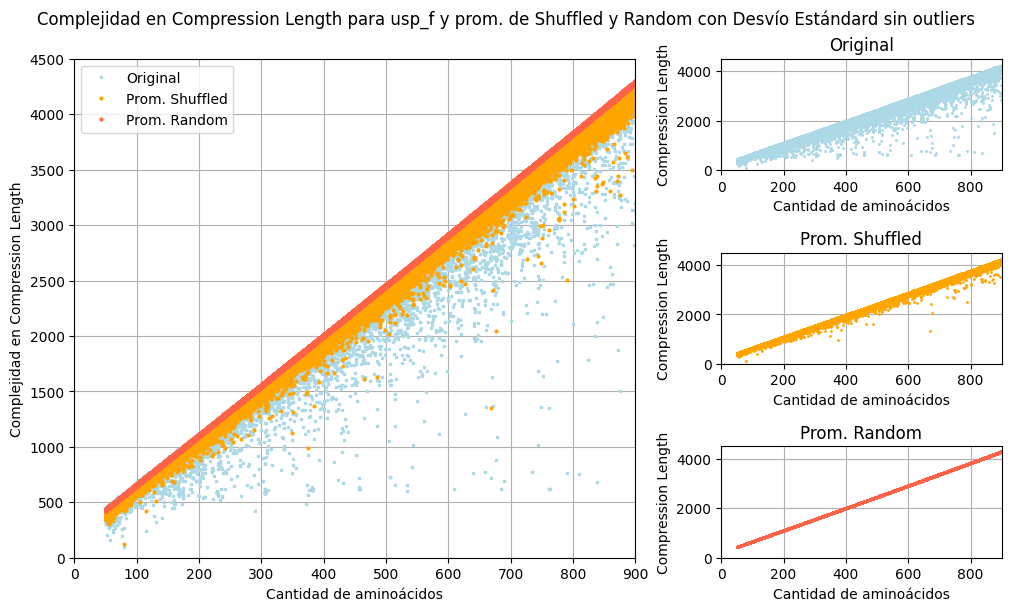

In [8]:
fig = plt.figure(figsize=(10, 6), layout='constrained')
fig.suptitle("Complejidad en " + complexity + " para " + dataset_name + " y prom. de Shuffled y Random con Desvío Estándard" + ("" if outliers else " sin outliers"))
axs = fig.subplot_mosaic([["main","main", "original"],
                          ["main","main", "shuffled"],
                          ["main","main", "random"]])

axs["main"].plot(sizes, original,'s', markersize=2, label = "Original", color=colors[0])
axs["main"].plot(sizes, mean_s, 'o', markersize=2, label = "Prom. Shuffled", color=colors[1])
axs["main"].fill_between(sizes, mean_s+sigma_s, mean_s-sigma_s, facecolor=colors[1], alpha=0.5)
axs["main"].plot(sizes, mean_r, 'o', markersize=2, label = "Prom. Random", color=colors[2])
axs["main"].fill_between(sizes, mean_r+sigma_r, mean_r-sigma_r, facecolor=colors[2], alpha=0.5)
axs["main"].legend()

axs["original"].set_title("Original")
axs["original"].plot(sizes, original, 's', markersize=1, color=colors[0])

axs["shuffled"].set_title("Prom. Shuffled")
axs["shuffled"].plot(sizes, mean_s, 'o', markersize=1, color=colors[1])
axs["shuffled"].fill_between(sizes, mean_s+sigma_s, mean_s-sigma_s, facecolor=colors[1], alpha=0.5)

axs["random"].set_title("Prom. Random")
axs["random"].plot(sizes, mean_r, 'o', markersize=1, color=colors[2])
axs["random"].fill_between(sizes, mean_r+sigma_r, mean_r-sigma_r, facecolor=colors[2], alpha=0.5)

for a in ["main", "original", "shuffled", "random"]:
    axs[a].set_ylabel(complexity)
    axs[a].set_xlabel("Cantidad de aminoácidos")
    axs[a].grid()
    if log_x:
        axs[a].set_xscale('log')
    if not outliers:
        axs[a].set_ylim(y_range)
        axs[a].set_xlim(0, upper_limit)
        if complexity == "Discrepancia":
            axs[a].set_ylim(0, 450)
    if    complexity == "Icalc":
        axs[a].set_ylim(top = 0.75)
        
axs["main"].set_ylabel("Complejidad en " + complexity)
axs["main"].set_xlabel("Cantidad de aminoácidos" + (" en escala logarítmica" if log_x else ""))

plt.show()

Detalle sobre el desvío estándar de los casos generados

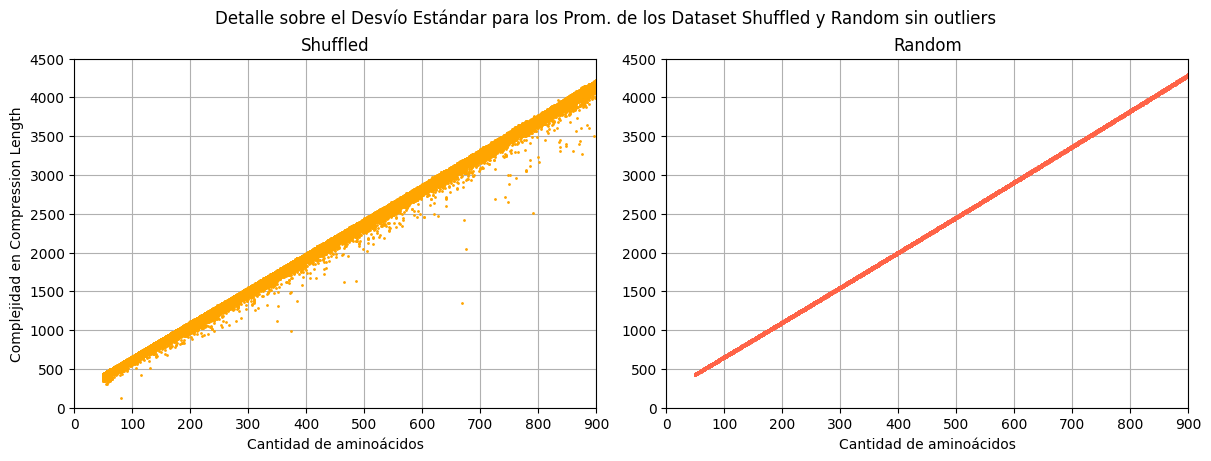

In [9]:
fig = plt.figure(figsize=(12, 4.5), layout='constrained')
(ax1, ax2) = fig.subplots(1, 2)

fig.suptitle("Detalle sobre el Desvío Estándar para los Prom. de los Dataset Shuffled y Random" + ("" if outliers else " sin outliers"))
ax1.set_title("Shuffled")
ax2.set_title("Random")
ax1.set_ylabel("Complejidad en " + complexity)
ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else ""))
ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else ""))

ax1.plot(sizes, mean_s, 'o', markersize=1, label='shuffled', color=colors[1])
ax1.fill_between(sizes, mean_s+sigma_s, mean_s-sigma_s, facecolor=colors[1], alpha=0.7)
ax1.grid()
ax2.plot(sizes, mean_r, 'o', markersize=1, label='random', color=colors[2])
ax2.fill_between(sizes, mean_r+sigma_r, mean_r-sigma_r, facecolor=colors[2], alpha=0.7)
ax2.grid()

#if complexity ==  "Icalc":
#    ax1.set_ylim(0.05, 0.75)
#    ax2.set_ylim(0.05, 0.75)
#elif complexity == "Discrepancia" and not outliers:
#    ax1.set_ylim(0, 450)
#    ax2.set_ylim(0, 450)
if log_x:
    ax1.set_xscale('log')
    ax2.set_xscale('log')
if not outliers:
    ax1.set_ylim(y_range)
    ax2.set_ylim(y_range)
    ax1.set_xlim(0, upper_limit)
    ax2.set_xlim(0, upper_limit)

plt.show()

#### Histogramas 2D

In [10]:
####### Seleccionar cant. de bins por eje #######
bins_x = 450
bins_y = 200

#################################################

In [11]:
all_s,  all_r, all_sizes = [], [], []

for i in range(10):
    all_s = all_s + shuffled_results[i+1]
    all_r = all_r + random_results[i+1]
    all_sizes = all_sizes + sizes

#Set colormap (un quilombo)
magma = mpl.colormaps['magma'].resampled(256)
newcolors = magma(np.linspace(0, 1, 100000))
white = np.array([256/256, 256/256, 256/256, 1]) # color en formato rgb: [R/256, G/256, B/256, 1]
newcolors[:1, :] = white
magma2 = ListedColormap(newcolors)

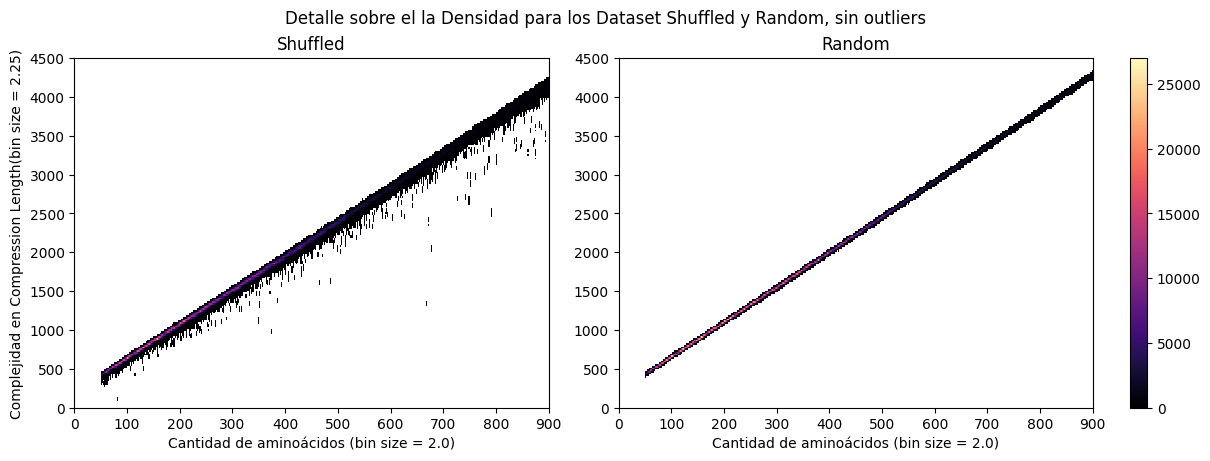

In [ ]:
fig = plt.figure(figsize=(12, 4.5), layout='constrained')
(ax1, ax2) = fig.subplots(1, 2)

fig.suptitle("Detalle sobre el la Densidad para los Dataset Shuffled y Random, sin outliers")
ax1.set_title("Shuffled")
ax2.set_title("Random")
ax1.set_ylabel("Complejidad en " + complexity + " (bin size = " + str(450/bins_y)[:7] + ")")
ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")
ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")

norm = get_norm(1000, all_sizes, all_s, all_r, bins_x, bins_y, [[0, 900], y_range])

ax1.hist2d(all_sizes, all_s, bins=(bins_x, bins_y), 
           range = [[0, 900], y_range],
           cmap = magma2,
           norm = norm)

qsy = ax2.hist2d(all_sizes, all_r, bins=(bins_x, bins_y),
           range = [[0, 900], y_range],
           cmap = magma2,
           norm = norm)

# ax2.hist2d devuelve (counts, xedges, yedges, Image) y sólo necesito el Image
fig.colorbar(qsy[3], ax=ax2)

if log_x:
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_xlim(40, 1000)
    ax2.set_xlim(40, 1000)
    
plt.show()

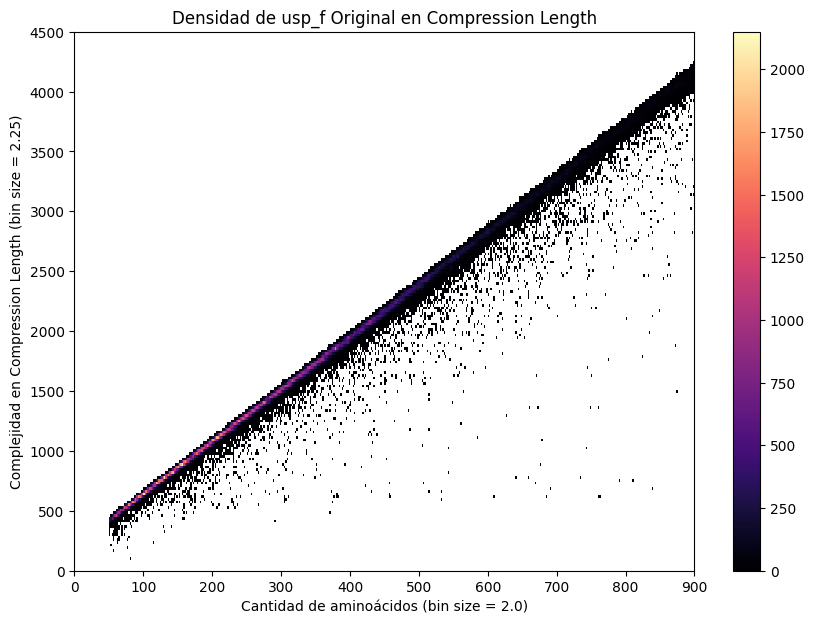

In [22]:
plt.figure(figsize=(10, 7))
plt.title("Densidad de " + dataset_name + " Original en " + complexity)
plt.ylabel("Complejidad en " + complexity + " (bin size = " + str(450/bins_y)[:7] + ")")
plt.xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")

plt.hist2d(sizes, original, bins=(bins_x,bins_y), 
           range = [[0, 900], y_range],
           cmap = magma2)
plt.colorbar()

if log_x:
    plt.xscale('log')
    plt.xlim(40, 1000)

plt.show()

Complejidad original / prom. complejidad shuffled punto a punto

In [15]:
quotient_s = np.divide(np.array(original), mean_s)
quotient_r = np.divide(np.array(original), mean_r)

if complexity == 'Icalc':
    y_range2 = [0.05, 0.75]
elif complexity == 'Kolmogorov':
    y_range2 = [0.1, 1.3]
elif complexity == 'Bennett':
    y_range2 = [0.4, 1.4]
else:
    y_range2 = [0.1, 1.1]

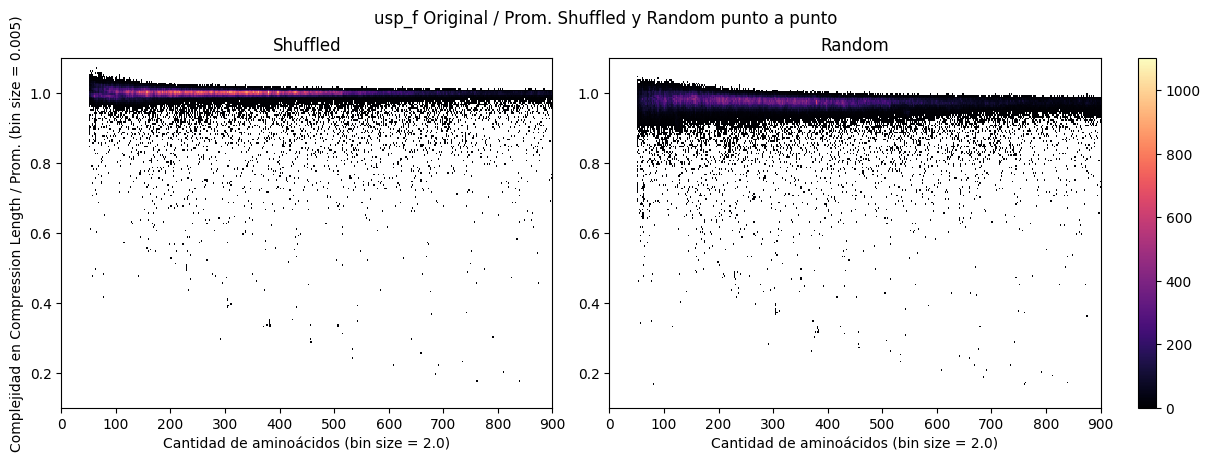

In [23]:
fig = plt.figure(figsize=(12, 4.5), layout='constrained')
(ax1, ax2) = fig.subplots(1, 2)

fig.suptitle(dataset_name + " Original / Prom. Shuffled y Random punto a punto")
ax1.set_title("Shuffled")
ax2.set_title("Random")
ax1.set_ylabel("Complejidad en " + complexity + " / Prom. (bin size = " + str(1/bins_y)[:7] + ")")
ax1.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")
ax2.set_xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")

norm = get_norm(100, sizes, quotient_s, quotient_r, bins_x, bins_y, [[0, 900], y_range2])

qsy = ax1.hist2d(sizes, quotient_s, bins=(bins_x, bins_y), 
           range = [[0, 900], y_range2],
           cmap = magma2,
           norm = norm)

qsy = ax2.hist2d(sizes, quotient_r, bins=(bins_x, bins_y),
           range = [[0, 900], y_range2],
           cmap = magma2,
           norm = norm)

# ax2.hist2d devuelve (counts, xedges, yedges, Image) y sólo necesito el Image
fig.colorbar(qsy[3], ax=ax2)

if log_x:
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax1.set_xlim(40, 1000)
    ax2.set_xlim(40, 1000)
    
plt.show()

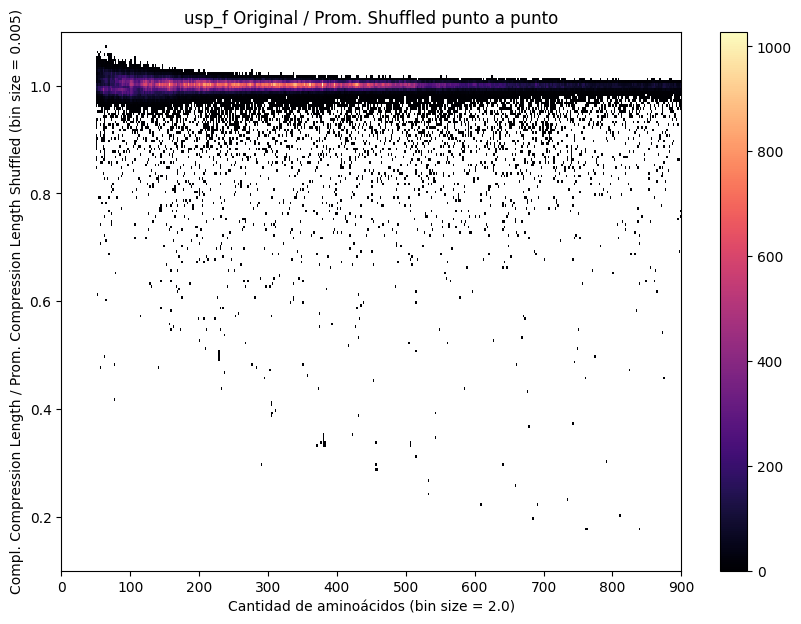

In [25]:
plt.figure(figsize=(10, 7))
plt.title(dataset_name + " Original / Prom. Shuffled punto a punto")
plt.ylabel("Compl. " + complexity + " / Prom. " + complexity + " Shuffled (bin size = " + str(1/bins_y)[:7] + ")")
plt.xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")

plt.hist2d(sizes, quotient_s, bins=(bins_x,bins_y), 
           range = [[0, 900], y_range2],
           cmap = magma2)
plt.colorbar()

if log_x:
    plt.xscale('log')
    plt.xlim(40, 1000)

plt.show()

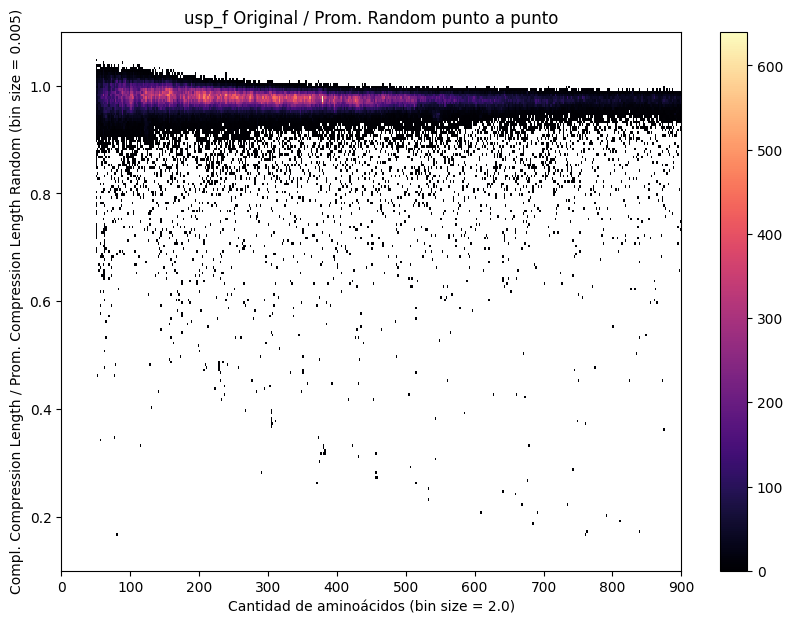

In [24]:
plt.figure(figsize=(10, 7))
plt.title(dataset_name + " Original / Prom. Random punto a punto")
plt.ylabel("Compl. " + complexity + " / Prom. " + complexity + " Random (bin size = " + str(1/bins_y)[:7] + ")")
plt.xlabel("Cantidad de aminoácidos"+ (" en escala logarítmica" if log_x else "") + " (bin size = " + str(900/bins_x)[:7] + ")")

plt.hist2d(sizes, quotient_r, bins=(bins_x,bins_y), 
           range = [[0, 900], y_range2],
           cmap = magma2)
plt.colorbar()

if log_x:
    plt.xscale('log')
    plt.xlim(40, 1000)

plt.show()